<a href="https://colab.research.google.com/github/bwbayu/Summer-Course/blob/main/course-2/summercourse_Course_2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Course 2B: Python for Data Analysis
## Group 8
# 1. Data Cleaning

In [128]:
# import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

pd.options.mode.chained_assignment = None  # default='warn'

In [129]:
# mount google drive to access/load the dataset
# from google.colab import drive
# drive.mount('/content/drive')

In [130]:
# read the dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/SummerCourse/dataset_summercourse.csv', delimiter=';')
df.head()

,order_id,quantity,product_id,price,seller_id,freight_value,customer_id,order_status,purchase_date,payment_type,product_category_name,product_weight_gram
0,2e7a8482f6fb09756ca50c10d7bfc047,2,f293394c72c9b5fafd7023301fc21fc2,1489000,1554a68530182680ad5c8b042c3ab563,28000,08c5351a6aca1c1589a38f244edeee9d,shipped,05/09/2016,virtual account,fashion,1800.0
1,2e7a8482f6fb09756ca50c10d7bfc047,1,c1488892604e4ba5cff5b4eb4d595400,1756000,1554a68530182680ad5c8b042c3ab563,45000,08c5351a6aca1c1589a38f244edeee9d,shipped,05/09/2016,virtual account,automotive,1400.0
2,e5fa5a7210941f7d56d0208e4e071d35,1,f3c2d01a84c947b078e32bbef0718962,1707000,a425f92c199eb576938df686728acd20,174000,683c54fc24d40ee9f8a6fc179fd9856c,canceled,05/09/2016,e-wallet,toys,700.0
3,3b697a20d9e427646d92567910af6d57,1,3ae08df6bcbfe23586dd431c40bddbb7,3071000,522620dcb18a6b31cd7bdf73665113a9,154000,355077684019f7f60a031656bd7262b8,delivered,03/10/2016,e-wallet,utilities,300.0
4,71303d7e93b399f5bcd537d124c0bcfa,1,d2998d7ced12f83f9b832f33cf6507b6,3833000,25e6ffe976bd75618accfe16cefcbd0d,147000,b106b360fe2ef8849fbbd056f777b4d5,canceled,03/10/2016,e-wallet,fashion,500.0


In [131]:
# dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               49999 non-null  object 
 1   quantity               49999 non-null  int64  
 2   product_id             49999 non-null  object 
 3   price                  49999 non-null  int64  
 4   seller_id              49999 non-null  object 
 5   freight_value          49999 non-null  int64  
 6   customer_id            49999 non-null  object 
 7   order_status           49999 non-null  object 
 8   purchase_date          49999 non-null  object 
 9   payment_type           49999 non-null  object 
 10  product_category_name  49999 non-null  object 
 11  product_weight_gram    49980 non-null  float64
dtypes: float64(1), int64(3), object(8)
memory usage: 4.6+ MB


From the information above the dataset consists of 12 columns and a total of almost 50K rows of data

In [132]:
# remove unnecessary columns
df_copy = df.drop(columns=['order_id', 'product_id', 'seller_id', 'customer_id'])

These columns are removed because it doesn't necessarily provide insights as it only act as an identifier (id) and the value of these columns are not readable/understandable for human either.

In [133]:
# dataframe after removing unnecessary columns
df_copy.head()

,quantity,price,freight_value,order_status,purchase_date,payment_type,product_category_name,product_weight_gram
0,2,1489000,28000,shipped,05/09/2016,virtual account,fashion,1800.0
1,1,1756000,45000,shipped,05/09/2016,virtual account,automotive,1400.0
2,1,1707000,174000,canceled,05/09/2016,e-wallet,toys,700.0
3,1,3071000,154000,delivered,03/10/2016,e-wallet,utilities,300.0
4,1,3833000,147000,canceled,03/10/2016,e-wallet,fashion,500.0


In [134]:
# see null data in each column
print(df_copy.isnull().sum())

quantity                  0
price                     0
freight_value             0
order_status              0
purchase_date             0
payment_type              0
product_category_name     0
product_weight_gram      19
dtype: int64


From the information above there is only one column that contains a null values (product_weight_gram), and the number of data that contain null value is rather small (19) compared to the whole dataset.

In [135]:
# see data that have column product_weight_gram null
df[df['product_weight_gram'].isnull()]
# *we intentionally used the unmodified df to see these data so that we can see their product_id

,order_id,quantity,product_id,price,seller_id,freight_value,customer_id,order_status,purchase_date,payment_type,product_category_name,product_weight_gram
1193,85f8ad45e067abd694b627859fa57453,1,09ff539a621711667c43eba6a3bd8466,2899000,8b8cfc8305aa441e4239358c9f6f2485,45000,1d088dea8732788ec35dd4ee6dd76112,delivered,30/01/2017,credit card,sports,NaN
5624,eb855beb3ac99461f7a076b4c3652472,1,5eb564652db742ff8f28759cd8d2652a,772000,4e922959ae960d389249c378d1c939f5,48000,c91289ce43149a8ea5560d446f1d1dd2,delivered,23/03/2017,e-wallet,sports,NaN
6284,a2456e7f02197951664897a94c87242d,1,5eb564652db742ff8f28759cd8d2652a,2079000,4e922959ae960d389249c378d1c939f5,160000,7317f41f2cf650174af819cdb68284f0,delivered,30/03/2017,e-wallet,fashion,NaN
6312,e3daea0200104991cb979c2fcc509ae7,1,5eb564652db742ff8f28759cd8d2652a,1379000,4e922959ae960d389249c378d1c939f5,179000,4730251e8934a542a009d77dfd027375,delivered,30/03/2017,debit card,automotive,NaN
6433,6f497c40431d5fb0cfbd6c943dd29215,1,5eb564652db742ff8f28759cd8d2652a,3591000,4e922959ae960d389249c378d1c939f5,87000,5beb36d1757aa17a044222a7d79b9820,delivered,01/04/2017,credit card,gadget,NaN
6480,1521c6bb7b1028154c8c67cf80fa809f,1,5eb564652db742ff8f28759cd8d2652a,1425000,4e922959ae960d389249c378d1c939f5,89000,ca29b2bf57243228e98eab2dab805ae9,delivered,02/04/2017,debit card,sports,NaN
6499,415cfaaaa8cea49f934470548797fed1,2,5eb564652db742ff8f28759cd8d2652a,4788000,4e922959ae960d389249c378d1c939f5,67000,a8dff6357fea30071032ff2091d16430,delivered,02/04/2017,e-wallet,automotive,NaN
6500,415cfaaaa8cea49f934470548797fed1,1,5eb564652db742ff8f28759cd8d2652a,1069000,4e922959ae960d389249c378d1c939f5,36000,a8dff6357fea30071032ff2091d16430,delivered,02/04/2017,virtual account,beauty,NaN
6555,101157d4fae1c9fb74a00a5dee265c25,1,5eb564652db742ff8f28759cd8d2652a,2841000,4e922959ae960d389249c378d1c939f5,111000,f72b2f8d9295ef93fd40a4c49f67a42b,delivered,03/04/2017,virtual account,beauty,NaN
7046,c1424efcde3c9e9febd9e1761667789e,1,5eb564652db742ff8f28759cd8d2652a,368000,4e922959ae960d389249c378d1c939f5,150000,8a80133b8ace6b21415367a131a75a26,delivered,07/04/2017,debit card,sports,NaN


In [136]:
# making sure that the product containing null value all have the same value (null)
print(df["product_weight_gram"][df["product_id"] == "09ff539a621711667c43eba6a3bd8466"].count())
print(df["product_weight_gram"][df["product_id"] == "5eb564652db742ff8f28759cd8d2652a"].count())

0
0


The above operation is done in the assumption of there might be misinput when data are inserted. In the case where the same product have different value in the column product_weight_gram (i.e. there is a product that have the same product_id but some data might have another value other than null) then the data containing null value will be replaced with the non-null value. This is done to prevent deletion of data.

But since in our case the same product have the same value (null), then we will delete these rows because the count of these data is also relatively small (19).

In [137]:
# Handling null data by droping them
df_dropnull = df_copy.dropna(subset=['product_weight_gram'])
df_dropnull.head()

,quantity,price,freight_value,order_status,purchase_date,payment_type,product_category_name,product_weight_gram
0,2,1489000,28000,shipped,05/09/2016,virtual account,fashion,1800.0
1,1,1756000,45000,shipped,05/09/2016,virtual account,automotive,1400.0
2,1,1707000,174000,canceled,05/09/2016,e-wallet,toys,700.0
3,1,3071000,154000,delivered,03/10/2016,e-wallet,utilities,300.0
4,1,3833000,147000,canceled,03/10/2016,e-wallet,fashion,500.0


In [138]:
# check for duplicated data
df_dropnull.duplicated().value_counts()

False    49980
Name: count, dtype: int64

There are no duplicated data.

For the next step we'll be changing some data type.

In [139]:
# see categorical data in order_status
df_dropnull['order_status'].value_counts()

order_status
delivered      48645
shipped          567
processing       270
canceled         267
invoiced         221
unavailable        7
approved           3
Name: count, dtype: int64

In [140]:
# see categorical data in payment_type
payment_counts = df['payment_type'].value_counts()
print(payment_counts)


payment_type
virtual account    12581
credit card        12498
debit card         12472
e-wallet           12448
Name: count, dtype: int64


In [141]:
# see categorical data in product_category_name
df['product_category_name'].value_counts()

product_category_name
toys           6375
electronics    6299
automotive     6286
fashion        6274
beauty         6225
gadget         6220
sports         6192
utilities      6128
Name: count, dtype: int64

In [142]:
# changing data type from object to categorical for categorical columns
categorical_columns = ["order_status","payment_type","product_category_name"]
df_dropnull[categorical_columns] = df_dropnull[categorical_columns].astype("category")
df_dropnull.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49980 entries, 0 to 49998
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   quantity               49980 non-null  int64   
 1   price                  49980 non-null  int64   
 2   freight_value          49980 non-null  int64   
 3   order_status           49980 non-null  category
 4   purchase_date          49980 non-null  object  
 5   payment_type           49980 non-null  category
 6   product_category_name  49980 non-null  category
 7   product_weight_gram    49980 non-null  float64 
dtypes: category(3), float64(1), int64(3), object(1)
memory usage: 2.4+ MB


In [143]:
# convert purchase_date type from object to datetime to be able to extract year and month
df_dropnull['purchase_date'] = pd.to_datetime(df_dropnull['purchase_date'], format='%d/%m/%Y')

df_dropnull['year'] = df_dropnull['purchase_date'].dt.year
df_dropnull['month'] = df_dropnull['purchase_date'].dt.month
df_dropnull['day'] = df_dropnull['purchase_date'].dt.day
df_dropnull.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49980 entries, 0 to 49998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   quantity               49980 non-null  int64         
 1   price                  49980 non-null  int64         
 2   freight_value          49980 non-null  int64         
 3   order_status           49980 non-null  category      
 4   purchase_date          49980 non-null  datetime64[ns]
 5   payment_type           49980 non-null  category      
 6   product_category_name  49980 non-null  category      
 7   product_weight_gram    49980 non-null  float64       
 8   year                   49980 non-null  int32         
 9   month                  49980 non-null  int32         
 10  day                    49980 non-null  int32         
dtypes: category(3), datetime64[ns](1), float64(1), int32(3), int64(3)
memory usage: 3.0 MB


In [144]:
# drop purchase date because we have separated them
df_cleaned = df_dropnull.drop(columns=['purchase_date'])

# 2. Data Analysis & Visualization

year
2017    49608
2016      372
Name: count, dtype: int64


<Axes: xlabel='year', ylabel='count'>

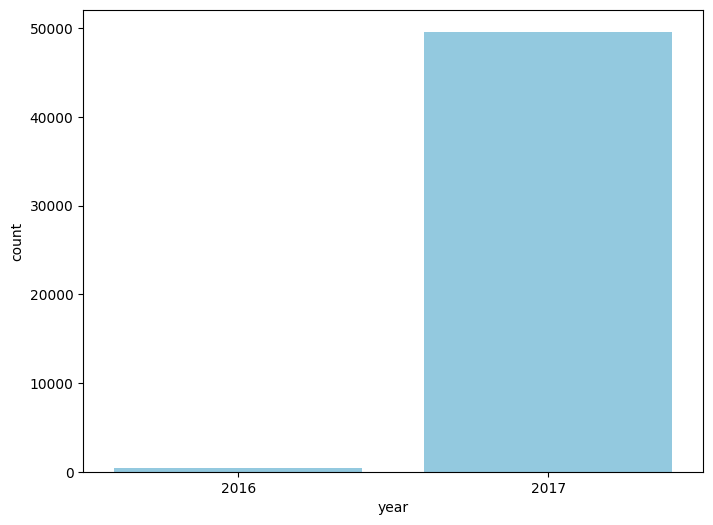

In [145]:
# seeing the distribution of years in the dataset
print(df_cleaned['year'].value_counts())

# visualize
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, x='year', color='skyblue')

From the chart above we can conclude that this dataset mainly contain data from the year 2017 (99%), since this is the case we will only analyze data from 2017.

month
11    8811
10    5426
8     5036
9     4976
7     4601
5     4217
12    4064
6     3711
3     3094
4     2733
2     1998
1      941
Name: count, dtype: int64


<Axes: xlabel='month', ylabel='count'>

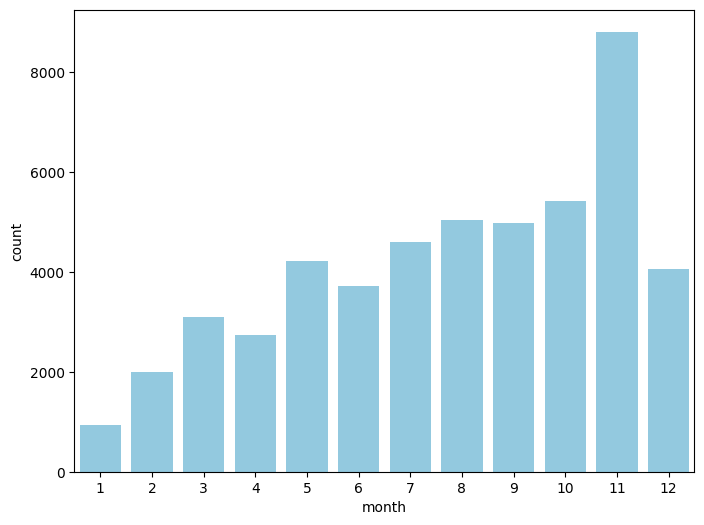

In [146]:
# month value_counts where year is 2017
df_2017 = df_cleaned[df_cleaned['year'] == 2017]
print(df_2017['month'].value_counts())

# visualize
plt.figure(figsize=(8, 6))
sns.countplot(data=df_2017, x='month', color='skyblue')

From this chart we can see that November is the month with the most amount of order while January is the least.

<Axes: xlabel='day', ylabel='count'>

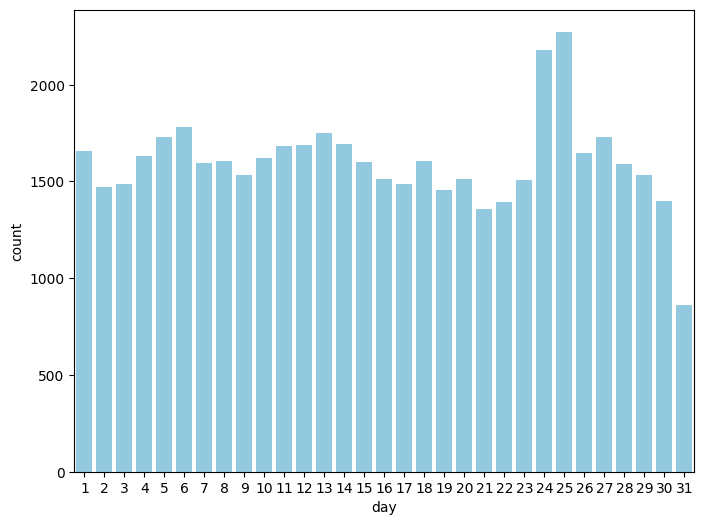

In [147]:
# date value_counts where year is 2017
# print(df_2017['day'].value_counts())

# visualize
plt.figure(figsize=(8, 6))
sns.countplot(data=df_2017, x='day', color='skyblue')

From the chart above there is an interesting part where in the day/date 24-25 the amount of order is higher than the rest, this is probably because in those date most people receive their salary

In [148]:
df_2017.reset_index(drop=True, inplace=True)
df_2017.head()

,quantity,price,freight_value,order_status,payment_type,product_category_name,product_weight_gram,year,month,day
0,1,4482000,93000,delivered,debit card,utilities,200.0,2017,1,5
1,1,645000,155000,delivered,e-wallet,fashion,200.0,2017,1,5
2,1,3222000,198000,delivered,credit card,sports,200.0,2017,1,5
3,1,3641000,116000,delivered,virtual account,utilities,200.0,2017,1,5
4,1,1658000,32000,delivered,e-wallet,fashion,200.0,2017,1,5


----------------------------------------------------------------------
# Average Price and Total Price for Every Month

In [149]:
monthly_price = df_2017.groupby(['month'])['price'].mean().reset_index()
print(monthly_price)

    month         price
0       1  2.560362e+06
1       2  2.568860e+06
2       3  2.609604e+06
3       4  2.588295e+06
4       5  2.606543e+06
5       6  2.615402e+06
6       7  2.592965e+06
7       8  2.637029e+06
8       9  2.612828e+06
9      10  2.621129e+06
10     11  2.604530e+06
11     12  2.616579e+06


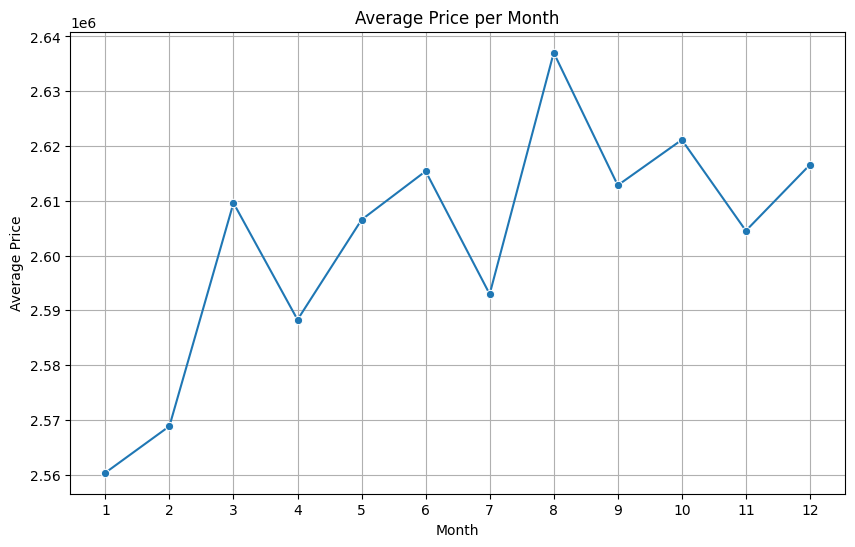

In [150]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_price, x='month', y='price', marker='o')
plt.title('Average Price per Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

In [151]:
# total price for every month
monthly_total_price = df_2017.groupby(['month'])['price'].sum().reset_index()
print(monthly_total_price)

    month        price
0       1   2409301000
1       2   5132582000
2       3   8074116000
3       4   7073809000
4       5  10991790000
5       6   9705757000
6       7  11930234000
7       8  13280078000
8       9  13001431000
9      10  14222248000
10     11  22948517000
11     12  10633776000


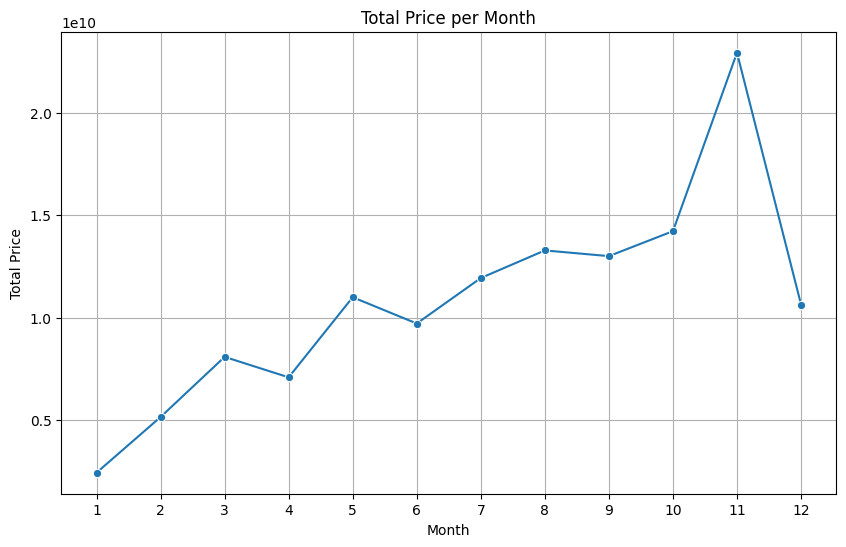

In [152]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_total_price, x='month', y='price', marker='o')
plt.title('Total Price per Month')
plt.xlabel('Month')
plt.ylabel('Total Price')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

## Analysis :
#### As we can see from the graph of average price and total price, the trend from January to November is positive but there is a downward trend in December, perhaps because many customers have already spent their money in November.

## Recommendation :
#### At the beginning of the month we can try to promote more or give discounts so that sales can also increase because compared to the last month, there are too few transactions in the first month.

--------------------------------------------------------------------
# Total Price for Every Product Category

In [153]:
product_price = df_2017.groupby(['product_category_name'])['price'].sum().reset_index()
print(product_price)

  product_category_name        price
0            automotive  16346605000
1                beauty  16153713000
2           electronics  16144822000
3               fashion  16328330000
4                gadget  15943069000
5                sports  16095228000
6                  toys  16491067000
7             utilities  15900805000


<ipython-input-154-8d352b2c245c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=product_price, x='price', y='product_category_name', palette='viridis')


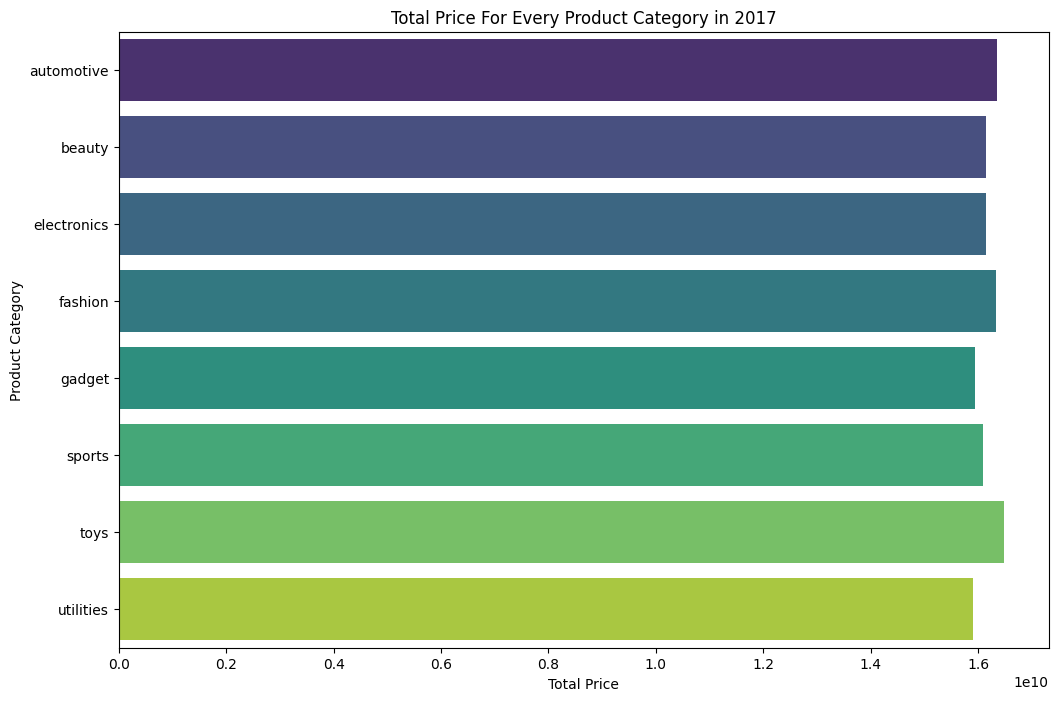

In [154]:
plt.figure(figsize=(12, 8))
sns.barplot(data=product_price, x='price', y='product_category_name', palette='viridis')
plt.title('Total Price For Every Product Category in 2017')
plt.xlabel('Total Price')
plt.ylabel('Product Category')
plt.show()

## Analysis :
#### From the total price for each product category graph, we can see that all categories have similar total prices. There are no significant differences between one category and another. This shows that demand for products from each category is relatively even and no one category dominates the market.

## Recommendation :
#### Reviewing new opportunities by developing new products in existing categories or categories that do not yet exist, such as health, food and beverage categories, etc to attract more customers.


---------------------------------------------------------------
# Top 10 Product by Quantity and Total Price

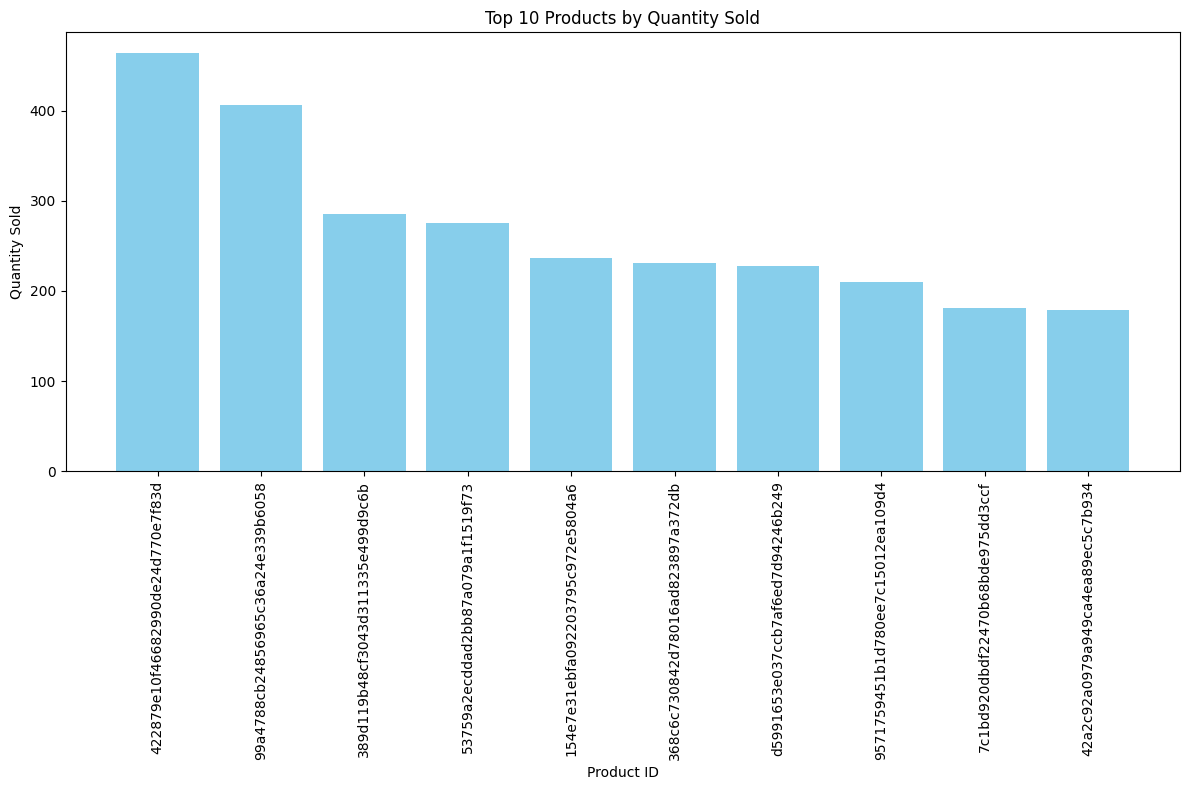

In [155]:
top_10_products = df.groupby('product_id')['quantity'].sum().reset_index().nlargest(10, 'quantity')
# print(top_10_products)

plt.figure(figsize=(12, 8))
plt.bar(top_10_products['product_id'], top_10_products['quantity'], color='skyblue')
plt.xlabel('Product ID')
plt.ylabel('Quantity Sold')
plt.title('Top 10 Products by Quantity Sold')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

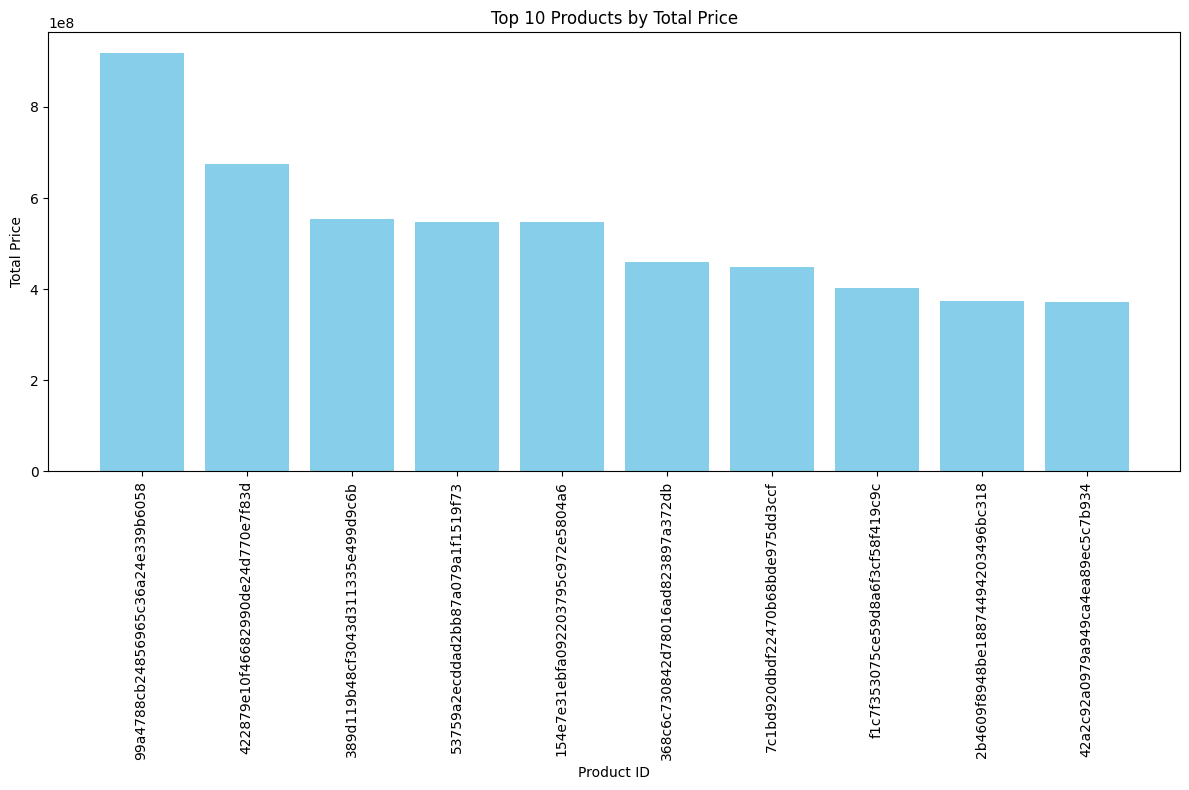

In [156]:
top_10_products = df.groupby('product_id')['price'].sum().reset_index().nlargest(10, 'price')
# print(top_10_products)

plt.figure(figsize=(12, 8))
plt.bar(top_10_products['product_id'], top_10_products['price'], color='skyblue')
plt.xlabel('Product ID')
plt.ylabel('Total Price')
plt.title('Top 10 Products by Total Price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Analysis :
#### From the graph of the top 10 products, we can see the products that are most in demand by customers. These products have a high level of popularity and contribute significantly to the total sales.

## Recommendation :
#### Identify alternative products that have similar characteristics or features to offer variety to customers and Focus marketing and promotional strategies to increase the visibility and sales of these products that have proven popular.

-----------------------------------------------------------------
# Top 10 Seller by Quantity and Total price

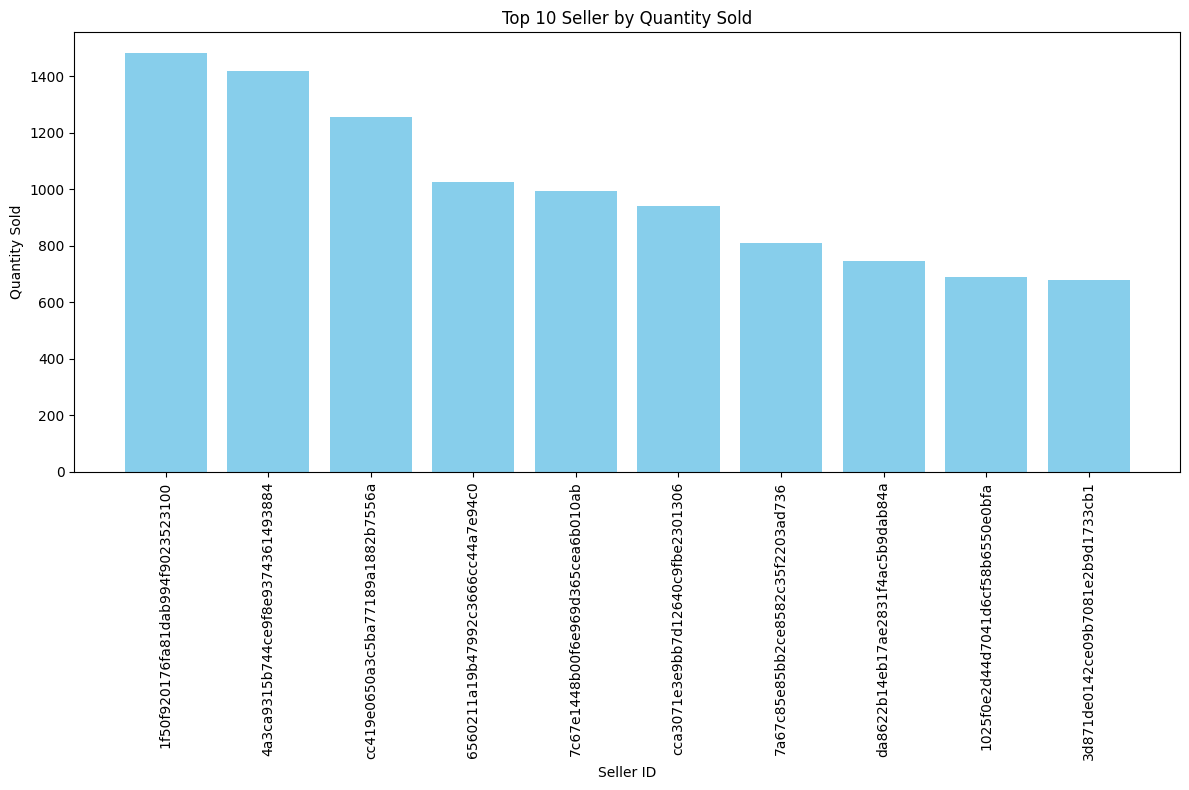

In [157]:
top_10_seller = df.groupby('seller_id')['quantity'].sum().reset_index().nlargest(10, 'quantity')
# print(top_10_seller)

plt.figure(figsize=(12, 8))
plt.bar(top_10_seller['seller_id'], top_10_seller['quantity'], color='skyblue')
plt.xlabel('Seller ID')
plt.ylabel('Quantity Sold')
plt.title('Top 10 Seller by Quantity Sold')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

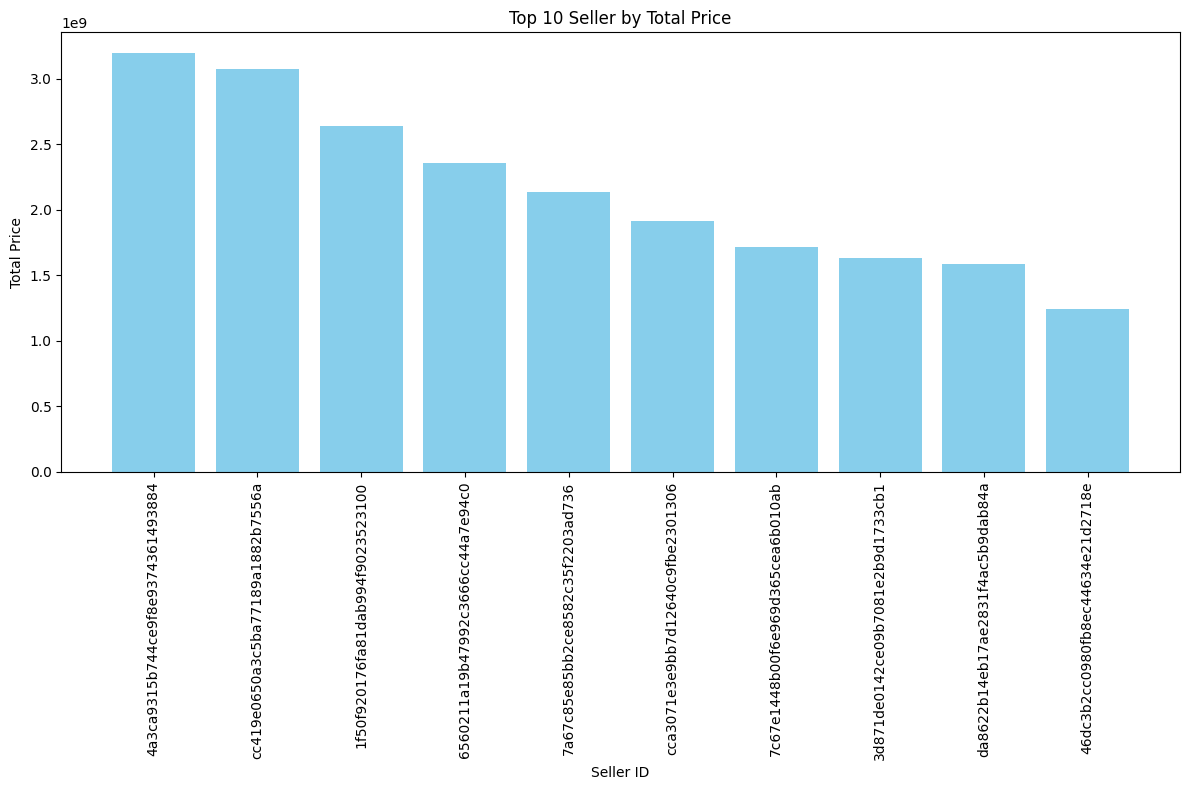

In [158]:
top_10_seller = df.groupby('seller_id')['price'].sum().reset_index().nlargest(10, 'price')
# print(top_10_seller)

plt.figure(figsize=(12, 8))
plt.bar(top_10_seller['seller_id'], top_10_seller['price'], color='skyblue')
plt.xlabel('Seller ID')
plt.ylabel('Total Price')
plt.title('Top 10 Seller by Total Price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Recommendation :
1. Provide additional support to high-transaction sellers to maintain their performance.

2. Identify opportunities to attract new sellers with high potential or expand cooperation with existing sellers.

3. Provide training, resource, and more marketing to support low-transaction sellers to helping them enhance their performance.